<a href="https://colab.research.google.com/github/HinePo/Heart-disease-classification-and-Hyper-Parameter-tuning/blob/master/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification and Hyper-Parameter Optimization

In this one I will try to find the best model to predict heart disease. It is a classification problem (person has heart disease? yes or no), and I will do some tests and analysis on the features, models, hyper parameters, optmizers and more.

Dataset:
https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the data

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Overview and Exploration

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# there are no missing values on the dataset
df.isnull().values.any()

False

In [6]:
df.shape

(303, 14)

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
# unique values on column 'cp'
set(df.cp)

{0, 1, 2, 3}

In [9]:
df.groupby('target').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,138,138,138,138,138,138,138,138,138,138,138,138,138
1,165,165,165,165,165,165,165,165,165,165,165,165,165


In [10]:
# group by 'cp'
df.groupby('cp').count()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
cp,,,,,,,,,,,,,
0,143,143,143,143,143,143,143,143,143,143,143,143,143
1,50,50,50,50,50,50,50,50,50,50,50,50,50
2,87,87,87,87,87,87,87,87,87,87,87,87,87
3,23,23,23,23,23,23,23,23,23,23,23,23,23


In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Color control: https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/

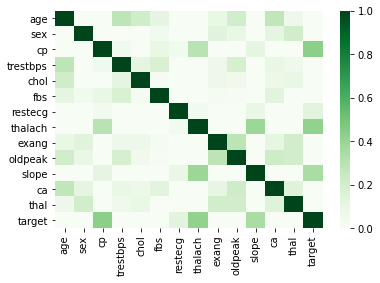

In [12]:
corr = df.corr()
sns.heatmap(corr, vmin = 0, vmax = 1, cmap = 'Greens')
# heatmap to visualize correlations for columns, especially column 'target'

Dataset: https://www.kaggle.com/ronitf/heart-disease-uci

"Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health."

So, we will use 'target' columns as our predicted variable.

## Features and target

In [13]:
# use the dataframe variable to create an array with the columns names 
all_vars = np.array(df.columns)
all_vars

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [14]:
# all features
features = np.array(all_vars[0:13])
features

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [15]:
# only features with best correlations to target
# this array is made to be changed and experiment with the dataset features
# while comparing with the results of all features (features variable)
features_sel = np.array(all_vars[[2, 6, 7, 10]])
features_sel

array(['cp', 'restecg', 'thalach', 'slope'], dtype=object)

In [16]:
# define target variable
# target: column we want to predict
target = np.array(all_vars[13])
target

array('target', dtype='<U6')

## Splitting

In [17]:
# all features
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.2,
                                                      stratify = df[target], random_state = 0)

In [18]:
# features_sel : features selected by analysing heatmap correlation (for test purposes)
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(df[features_sel], df[target], test_size = 0.2,
                                                      stratify = df[target], random_state = 0)

## Models

### Support Vector Machine

Link for documentation:
https://scikit-learn.org/stable/modules/svm.html

In [19]:
from sklearn.svm import LinearSVC

In [20]:
def svm_test(X_train, y_train, cv = 10):
  np.random.seed(0)
  svc = LinearSVC()
  cv_scores = cross_val_score(svc, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of', cv, 'tests: ', cv_scores.mean())

In [21]:
print("Using all features to predict: ")
svm_test(X_train, y_train)

print("\nUsing only selected features to predict: ")
svm_test(X_train_sel, y_train_sel)

Using all features to predict: 
Average of 10 tests:  0.6501666666666667

Using only selected features to predict: 
Average of 10 tests:  0.6523333333333333


### Random Forest

Link for documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
def rfc_test(X_train, y_train, n_estimators = 100, cv = 10):
  np.random.seed(0)
  rfc = RandomForestClassifier(n_estimators = n_estimators, random_state = 0, n_jobs = -1)
  cv_scores = cross_val_score(rfc, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of', cv, 'tests: ', cv_scores.mean())

In [24]:
print("Using all features to predict: ")
rfc_test(X_train, y_train)

print("\nUsing only selected features to predict: ")
rfc_test(X_train_sel, y_train_sel)

Using all features to predict: 
Average of 10 tests:  0.8098333333333333

Using only selected features to predict: 
Average of 10 tests:  0.6819999999999999


### XGBClassifier

Link for documentation: https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [25]:
from xgboost import XGBClassifier

In [26]:
def xgb_test(X_train, y_train, n_estimators = 100, cv = 10):
  np.random.seed(0)
  xgb = XGBClassifier(n_estimators = n_estimators, random_state = 0, n_jobs = -1)
  cv_scores = cross_val_score(xgb, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of', cv, 'tests: ', cv_scores.mean())

In [27]:
print("Using all features to predict: ")
xgb_test(X_train, y_train)

print("\nUsing only selected features to predict: ")
xgb_test(X_train_sel, y_train_sel)

Using all features to predict: 
Average of 10 tests:  0.8015000000000001

Using only selected features to predict: 
Average of 10 tests:  0.7231666666666666


### Multi-Layer Perceptron

Link for documentation: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [29]:
def mlp_test(X_train, y_train, cv = 10):
  np.random.seed(0)

  mlp = MLPClassifier()
  scaler = StandardScaler()
  pipe = Pipeline([('scaler', scaler), ('mlp', mlp)])

  cv_scores = cross_val_score(pipe, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of', cv,  'tests: ', cv_scores.mean())

In [30]:
print("Using all features to predict: ")
mlp_test(X_train, y_train)

print("\nUsing only selected features to predict: ")
mlp_test(X_train_sel, y_train_sel)

Using all features to predict: 
Average of 10 tests:  0.8099999999999999

Using only selected features to predict: 
Average of 10 tests:  0.7641666666666668


## Fit chosen model

In [31]:
# fitting/training only for all the features case, since it has proven to show better results
model = RandomForestClassifier(random_state = 0, n_jobs = -1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
predictions = model.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print("Results for test data: Random Forest trained", score)

Results for test data: Random Forest trained 0.8524590163934426


In [33]:
cm_rfc = confusion_matrix(predictions, y_test)
cm_rfc

array([[23,  4],
       [ 5, 29]])

## Hyper Parameter Optimization

In [34]:
from sklearn.model_selection import RandomizedSearchCV

### Define parameter dictionary and distribution

Link for RandomizedSearchCV documentation

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

As an example, we will experiment optmizing the RandomForestClassifier model with two models: RandomForestClassifier and XGBClassifier.

In [35]:
# parameters dictionary for RFC
# check documentation for RFC

params_rfc = {
 "n_estimators"     : [50, 100, 150, 200],
 "max_depth"        : [None, 0, 1, 3, 4, 5],
 "min_samples_leaf" : [1, 2],
 "min_weight_fraction_leaf": [0.0, 0.5, 0.8]
}

In [36]:
# parameters dictionary for XGB
# check documentation for XGB

params_xgb = {
 "n_estimators"     : [50, 100, 150, 200, 250],
 "learning_rate"    : [0.10, 0.20, 0.30, 0.40, 0.50, 0.60],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 , 0.5],
 "colsample_bytree" : [0.60 , 0.80, 0.90, 0.95]
}

### Optimizing RFC

In [37]:
# optimizing rfc (Random Forest Classifier)
random_search_rfc = RandomizedSearchCV(RandomForestClassifier(),
                                       param_distributions = params_rfc,
                                       scoring='accuracy',
                                       n_jobs = -1,
                                       cv=10)

random_search_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [38]:
# Random Search score for the training data
random_search_rfc.score(X_train,y_train)

0.9049586776859504

In [39]:
# optimized RFC model
random_search_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
# optimized RFC parameters
random_search_rfc.best_params_

{'max_depth': 4,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150}

In [41]:
# cv score for the optimized RFC model
opt_rfc = random_search_rfc.best_estimator_

score = cross_val_score(opt_rfc, X_train, y_train, cv = 10)
print("Cross Validation score for Optimized Random Forest", score.mean())
# parameter optimization increased the CV_score of RFC model, calculated using the training data

Cross Validation score for Optimized Random Forest 0.8221666666666666


In [42]:
# fit optimal rfc
opt_rfc.fit(X_train, y_train)

# predict on test data
predictions = opt_rfc.predict(X_test)

# evaluate results
score = metrics.accuracy_score(y_test, predictions)
print("Results for test data: Random Forest Optimized and trained", score)

# but the accuracy on new data (test data) actually decreased
# this case when the aacuracy increases on the train data but decreases on the test data
# is called Overfitting

Results for test data: Random Forest Optimized and trained 0.8360655737704918


In [43]:
cm_rfc_opt = confusion_matrix(predictions, y_test)
cm_rfc_opt

array([[22,  4],
       [ 6, 29]])

### Optimizing XGBClassifier

In [44]:
# optimizing xgb (XGB Classifier)
random_search_xgb = RandomizedSearchCV(XGBClassifier(),
                                       param_distributions = params_xgb,
                                       scoring='accuracy',
                                       n_jobs = -1,
                                       cv=10)

random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                           verbosity=1),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [

In [45]:
# Random Search score for the training data
random_search_xgb.score(X_train,y_train)

1.0

In [46]:
# optimized XGB model
random_search_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.5,
              learning_rate=0.5, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
# optimized XGB parameters
random_search_xgb.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.5,
 'learning_rate': 0.5,
 'max_depth': 15,
 'n_estimators': 150}

In [48]:
# cv score for the optimized RFC model
opt_xgb = random_search_xgb.best_estimator_

score = cross_val_score(opt_xgb, X_train, y_train, cv = 10)
print("Cross Validation score for Optimized XGB", score.mean())
# parameter optimization increased the CV_score of XGB model, calculated using the training data

Cross Validation score for Optimized XGB 0.8265


In [49]:
# fit optimal xgb
opt_xgb.fit(X_train, y_train)

# predict on test data
predictions = opt_rfc.predict(X_test)

# evaluate results
score = metrics.accuracy_score(y_test, predictions)
print("Results for test data: XGB Optimized and trained", score)

# Results for test data using Optimized XGB are also better,
# meaning that the optimization process for the XGB worked well

Results for test data: XGB Optimized and trained 0.8360655737704918


In [50]:
cm_xgb_opt = confusion_matrix(predictions, y_test)
cm_xgb_opt

array([[22,  4],
       [ 6, 29]])

## Conclusions

For this heart disease prediction problem and this small dataset - only 303 rows, it's possible to achieve accuracies above 85 % when predicting in new data.

In machine learning, we should always try different models and hyperparameters to get better predictions. Using theoretical knowledge, creativity and different techniques is key to achieve the best possible results when predicting with AI.